In [1]:
import torch
from torch.jit import script, trace

USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print(device)

cuda


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp -r "/content/gdrive/MyDrive/Colab Notebooks/Liveness_code/final_antispoofing_mickey.zip" "/content"

In [4]:
import zipfile
archive = zipfile.ZipFile('/content/final_antispoofing_mickey.zip')
archive.extractall('/content')

# Data Preprocessing (4 Steps)

*   Step 1: Create new directory structure for the datasets
*   Step 2: Copying images imto new directory structure
*   Step 3: Dataset Exploration
*   Step 4: Dataset Visualization

# Step 1 : Original VS New Directory Structure

Original VS New Dataset Structure


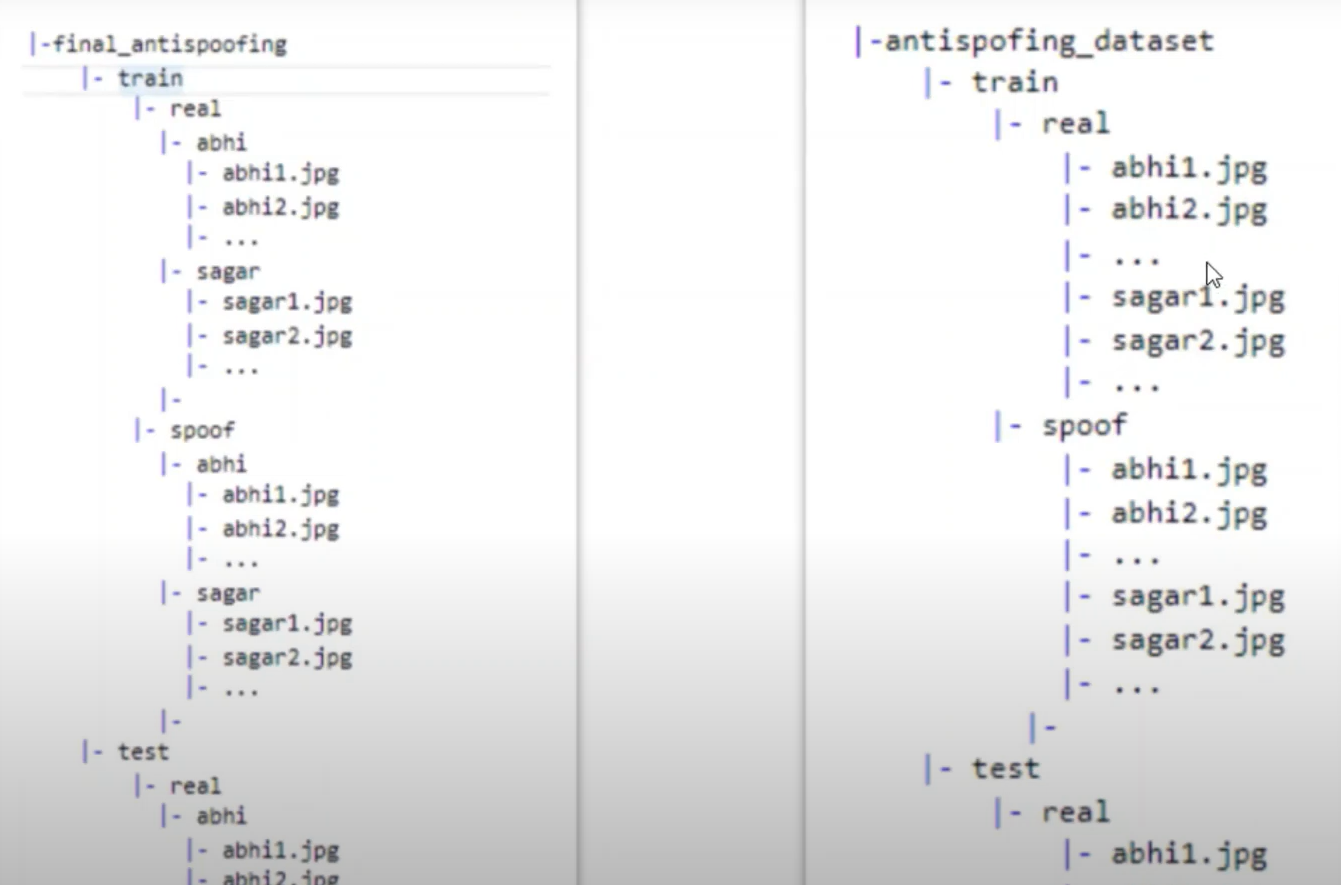

In [5]:
# Don't have original file, i captured from youtube.... structure file (original vs new_dataset.png) ##
from IPython import display
print("Original VS New Dataset Structure")
display.Image('/content/gdrive/MyDrive/original vs new_dataset.png')


In [6]:
dataset_dir = '/content/final_antispoofing_mickey'
train_dataset_dir = '/content/final_antispoofing_mickey/train'
test_dataset_dir = '/content/final_antispoofing_mickey/test'

In [7]:
import os
os.mkdir('/content/antispoofing_mickey_dataset')
os.mkdir('/content/antispoofing_mickey_dataset/train')
os.mkdir('/content/antispoofing_mickey_dataset/test')
os.mkdir('/content/antispoofing_mickey_dataset/train/real')
os.mkdir('/content/antispoofing_mickey_dataset/train/spoof')
os.mkdir('/content/antispoofing_mickey_dataset/test/real')
os.mkdir('/content/antispoofing_mickey_dataset/test/spoof')

In [8]:
train_dir='/content/antispoofing_mickey_dataset/train'
test_dir = '/content/antispoofing_mickey_dataset/test'

# Step 2: Copy Old File dataset to New File dataset

In [9]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [10]:
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory,split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category,subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(train_dir,category,img))
          else:
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(test_dir,category,img))

In [11]:
train_test_splits(data_directory=dataset_dir)

# Step 3: Dataset Exploration

In [12]:
categories = ['real','spoof']

In [13]:
print("--------------- Exploring Training Datasets ---------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("--------------- Exploring Testing Datasets ---------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

--------------- Exploring Training Datasets ---------------
There are 2156 images in real directory
There are 2118 images in spoof directory
There are 4274 total images in training directory
--------------- Exploring Testing Datasets ---------------
There are 531 images in real directory
There are 474 images in spoof directory
There are 1005 total images in testing directory


# Step 4: Dataset Visualization when you have trained dataset and catching dataset

In [14]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [15]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()

In [16]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['/content/antispoofing_mickey_dataset/train/real/0.jpg', '/content/antispoofing_mickey_dataset/train/real/Sunil Koirala48brightness0.55.jpg', '/content/antispoofing_mickey_dataset/train/real/Samir tamang30.jpg', '/content/antispoofing_mickey_dataset/train/real/Sudeep Subedi31hr_flipbrightness0.6.jpg', '/content/antispoofing_mickey_dataset/train/real/Rihan Ale16.jpg', '/content/antispoofing_mickey_dataset/train/real/Suraj Khanal12brightness1.33.jpg', '/content/antispoofing_mickey_dataset/train/real/WIN_20201110_13_21_08_Prohr_flip.jpg', '/content/antispoofing_mickey_dataset/train/real/None8.jpg', '/content/antispoofing_mickey_dataset/train/real/kjdfjsdkfj5.jpg', '/content/antispoofing_mickey_dataset/train/real/dfjsdfjk4.jpg', '/content/antispoofing_mickey_dataset/train/real/Sudeep Subedi4.jpg', '/content/antispoofing_mickey_dataset/train/real/Shikshya Gautam31hr_flip.jpg', '/content/antispoofing_mickey_dataset/train/real/ghfdtrdtfyh48.jpg', '/content/antispoofing_mickey_dataset/train/r

# Training Dataset Visualization

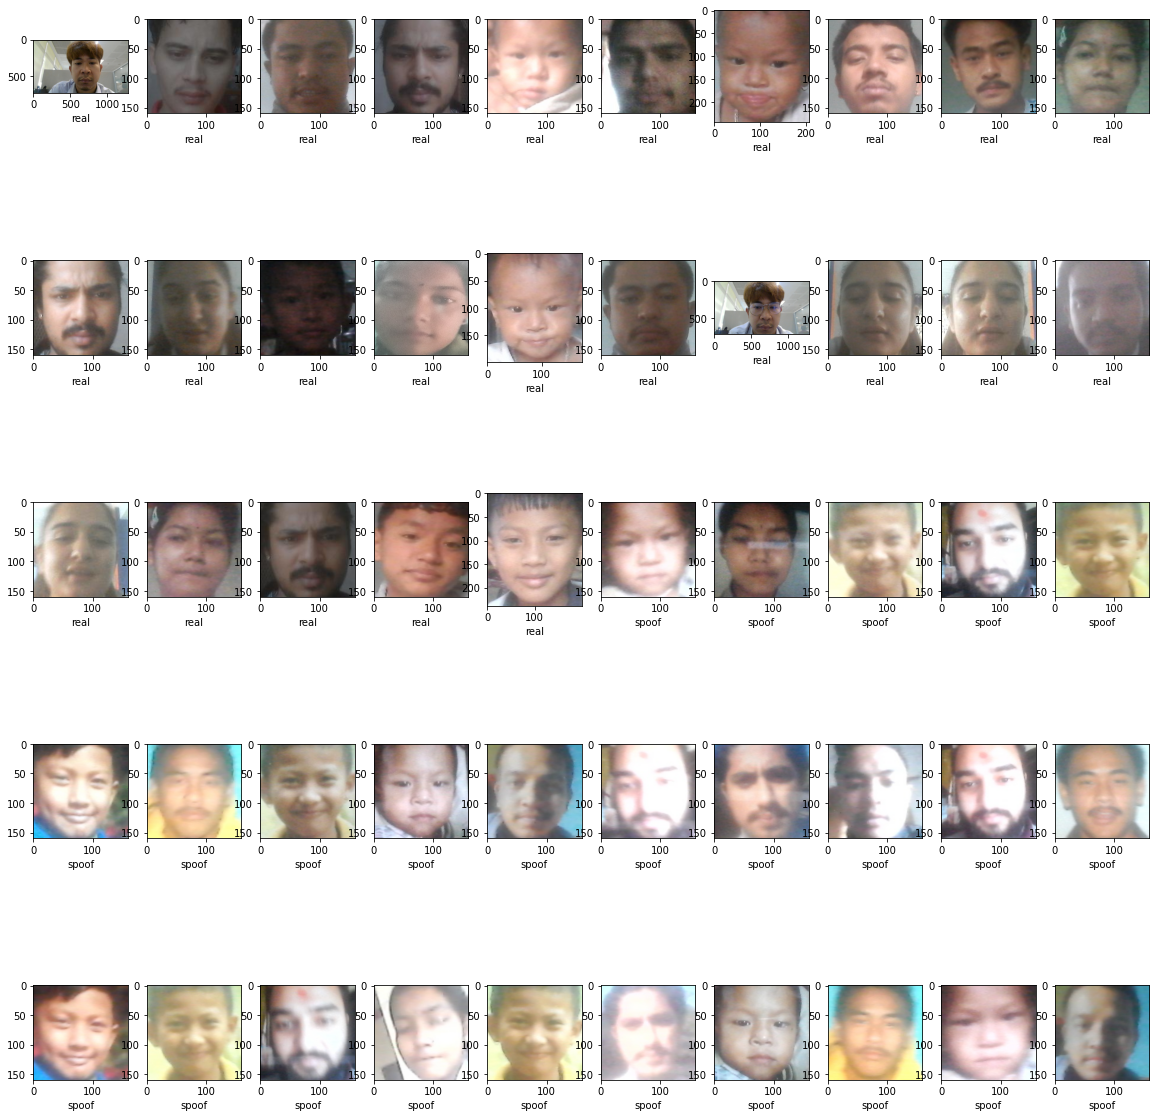

In [17]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

# Testing Dataset Visualization

In [18]:
testing_image_path = get_images(data_dir=test_dir,number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path))

['/content/antispoofing_mickey_dataset/test/real/0.jpg', '/content/antispoofing_mickey_dataset/test/real/kjdfjsdkfj21.jpg', '/content/antispoofing_mickey_dataset/test/real/Suraj Khanal47hr_flipbrightness1.31.jpg', '/content/antispoofing_mickey_dataset/test/real/WIN_20201110_13_22_02_Probrightness0.89.jpg', '/content/antispoofing_mickey_dataset/test/real/16.jpg', '/content/antispoofing_mickey_dataset/test/real/WIN_20201110_13_23_55_Pro.jpg', '/content/antispoofing_mickey_dataset/test/real/30.jpg', '/content/antispoofing_mickey_dataset/test/real/29.jpg', '/content/antispoofing_mickey_dataset/test/real/WIN_20201119_10_48_56_Pro.jpg', '/content/antispoofing_mickey_dataset/test/real/jfdhfjhsdjf41.jpg', '/content/antispoofing_mickey_dataset/test/real/WIN_20201119_10_49_28_Prohr_flip.jpg', '/content/antispoofing_mickey_dataset/test/real/9.jpg', '/content/antispoofing_mickey_dataset/test/real/jkhjhj24.jpg', '/content/antispoofing_mickey_dataset/test/real/Sumit tamang25.jpg', '/content/antispoo

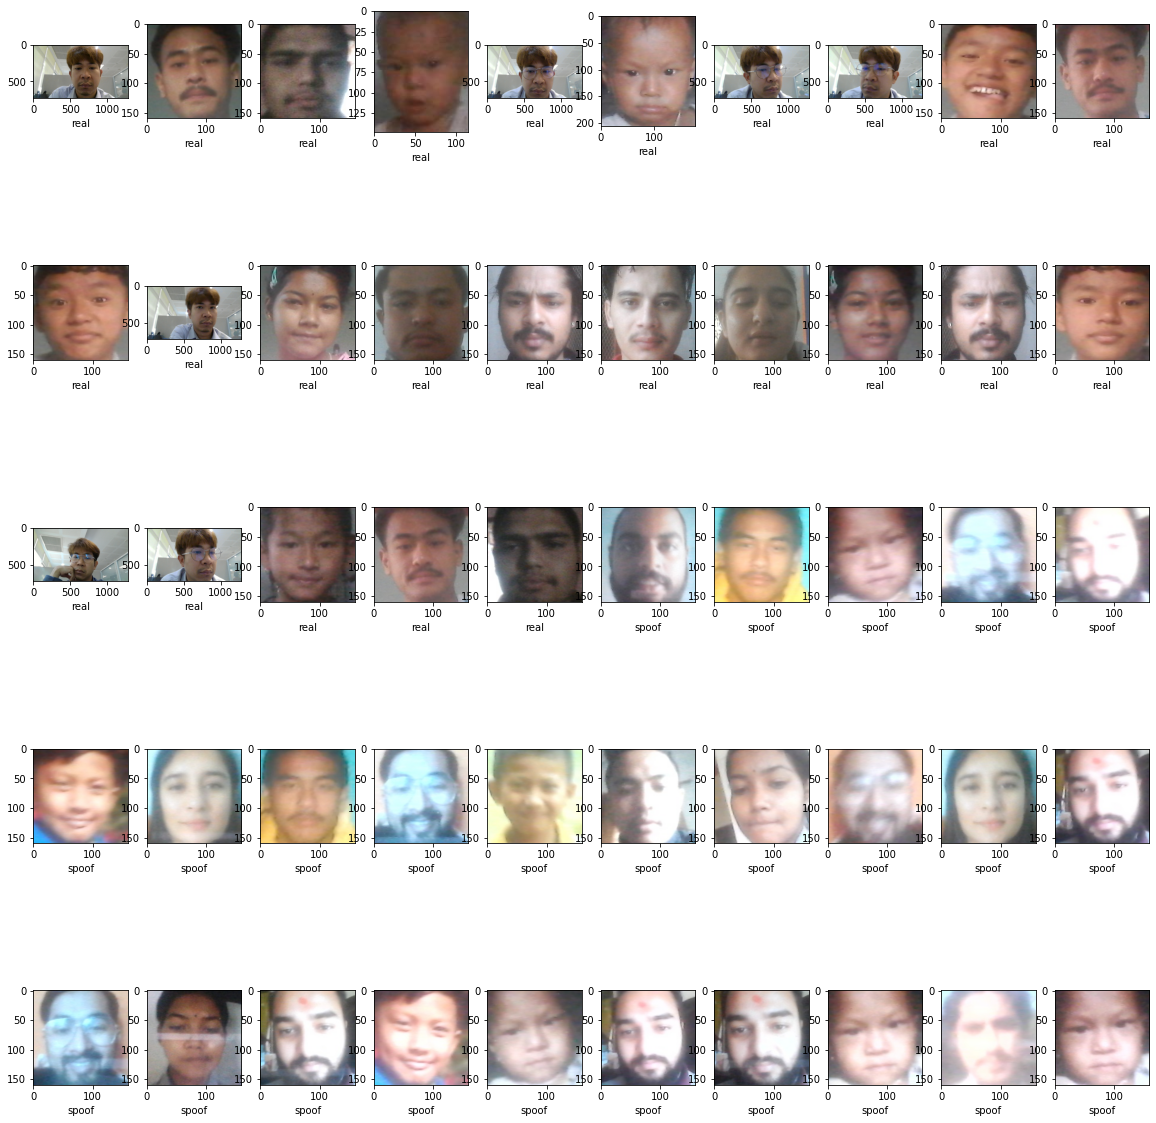

In [19]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

# Step Of Model Preparation

1.   Choosing Framework and importing necessary libraies
2.   Load datasets and perform image augmentations
3.   Model selection
4.   Compiling our model
5.   Setting our model checkpoints
------------------------------------------------------------------
# Step 1 Keras Framework: Choosing Framework and importing necessary libraies





In [20]:
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json

# Step 2 Load datasets and perform image augmentations

In [21]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,
                                   fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

Found 4274 images belonging to 2 classes.


In [23]:
valid_generator = valid_datagen.flow_from_directory(test_dir,target_size=(160,160),color_mode='rgb',
                                                     class_mode='binary',batch_size=25)

Found 1005 images belonging to 2 classes.


# Step 3 Model Selection and Transfer Learning

In [24]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(160,160,3)))

9406464/9406464 [==============================] - 0s 0us/step


In [25]:
mobilenet.trainable = False

In [26]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [27]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']           

# Step 4 Compiling the models

In [28]:
# tell the model what cost and optimization method to use
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(
        learning_rate=0.000001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    ),
    metrics=['accuracy']
)

# Step 5 Setting our model checkpoints

In [29]:
import os
os.mkdir('/content/model_weights/')

In [30]:
model_checkpoint = ModelCheckpoint('./model_weights/finalyearproject_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.h5',
                                   monitor='val_loss', mode='min', verbose=1, save_best_only=True, save_weights_only=True)

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 25,
    epochs = 100,
    callbacks = [model_checkpoint])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
170/170 [==============================] - ETA: 0s - loss: 0.8953 - accuracy: 0.5571
Epoch 1: val_loss improved from inf to 0.85099, saving model to ./model_weights/finalyearproject_antispoofing_model_01-0.506000.h5
170/170 [==============================] - 42s 196ms/step - loss: 0.8953 - accuracy: 0.5571 - val_loss: 0.8510 - val_accuracy: 0.5060
Epoch 2/100
170/170 [==============================] - ETA: 0s - loss: 0.7814 - accuracy: 0.5823
Epoch 2: val_loss improved from 0.85099 to 0.74499, saving model to ./model_weights/finalyearproject_antispoofing_model_02-0.561000.h5
170/170 [==============================] - 32s 186ms/step - loss: 0.7814 - accuracy: 0.5823 - val_loss: 0.7450 - val_accuracy: 0.5610
Epoch 3/100
170/170 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.6237
Epoch 3: val_loss improved from 0.74499 to 0.67399, saving model to ./model_weights/finalyearproject_antispoofing_model_03-0.600000.h5
170/170 [==============================]

# Serialize model to JSON

In [ ]:
model_json = model.to_json()
with open("finalyearproject_antispoofing_model_mobilenet.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,train_loss,'g',label='Traisning loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training Vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path = os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
    return predictor

In [ ]:
check_fakes(test_dir,categories[1])

In [ ]:
check_fakes(test_dir,categories[0])